<a href="https://colab.research.google.com/github/mroesler101/StockPredictor/blob/main/Stock_Price_Prediction_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# I used this source to help me find a huge NASDAQ csv file containing stock names: https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f
# Market categories feature in CSV file: Q = NASDAQ Global Select MarketSM; G = NASDAQ Global MarketSM; S = NASDAQ Capital Market
# Round lot size feature: securities to be traded on exchange (typically 100)
import pandas as pd
import seaborn as sb
import numpy as np 
!pip install --upgrade yfinance
import yfinance as yf # Yahoo finance will provide historical stock prices to use for the predictions
import datetime
import time
import requests
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

     |████████████████████████████████| 5.5MB 6.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=eeb34e9cb30f398e52d2698a16d256ee7ea5e5a9bfa77a0b6db36ecb9dc00c3d
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
start = datetime.datetime(2020,11,30) # Start and end time to look at stock history (1 month from november-december 2020 in this model)
end = datetime.datetime(2020,12,31)

In [ ]:
# List of stocks in NASDAQ found from towardsdatascience.com to have a collection of stocks to form a model
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
Symbols = companies['Symbol'].tolist() #create list for the various companies

In [ ]:
# This creates an empty list
stock_final = pd.DataFrame()
# Go through every symbol that we added to the list
for i in Symbols:  
    
    # This prints each symbol that is being acquired for
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # Yahoo Finance - finds and collects the information needed to complete the dataframe and list for predictions
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # This appends the individual stock prices to the list
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

#I found this function on towardsdatascience.com to download the finance history and stock statistics from yahoo finance and pair it with the individual stock names from the list

0 : AAIT,1 : AAL,2 : AAME,3 : AAOI,4 : AAON,5 : AAPL,6 : AAVL,
1 Failed download:
- AAVL: No data found for this date range, symbol may be delisted
7 : AAWW,8 : AAXJ,9 : ABAC,
1 Failed download:
- ABAC: No data found for this date range, symbol may be delisted
10 : ABAX,
1 Failed download:
- ABAX: No data found for this date range, symbol may be delisted
11 : ABCB,12 : ABCD,
1 Failed download:
- ABCD: No data found for this date range, symbol may be delisted
13 : ABCO,14 : ABCW,
1 Failed download:
- ABCW: No data found for this date range, symbol may be delisted
15 : ABDC,
1 Failed download:
- ABDC: No data found, symbol may be delisted
16 : ABGB,
1 Failed download:
- ABGB: No data found for this date range, symbol may be delisted
17 : ABIO,18 : ABMD,19 : ABTL,
1 Failed download:
- ABTL: No data found for this date range, symbol may be delisted
20 : ABY,
1 Failed download:
- ABY: No data found for this date range, symbol may be delisted
21 : ACAD,22 : ACAS,
1 Failed download:
- ACAS: N

In [ ]:
stock_final
# This prints all of the features (opening price, high and low prices, closing price for the day, volume, and the name of the stock)
# It is labelled by the dates I selected above for choosing the AMAZING year of 2020, as seen from the dates, some days are skipped due to imperfect findings, but yahoo finance updates their statistics everyday

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2020-11-30,0.062000,0.062000,0.061000,0.061000,0.061000,228648,AAIT
2020-12-01,0.062000,0.062000,0.062000,0.062000,0.062000,111437,AAIT
2020-12-02,0.062000,0.062000,0.062000,0.062000,0.062000,42000,AAIT
2020-12-03,0.061000,0.063000,0.061000,0.062000,0.062000,368068,AAIT
2020-12-07,0.063000,0.064000,0.063000,0.064000,0.064000,163388,AAIT
...,...,...,...,...,...,...,...
2020-12-23,36.520000,37.000000,35.810001,36.650002,36.650002,314400,ZUMZ
2020-12-24,36.939999,37.139999,35.970001,36.009998,36.009998,94800,ZUMZ
2020-12-28,36.230000,37.240002,35.830002,36.709999,36.709999,233800,ZUMZ


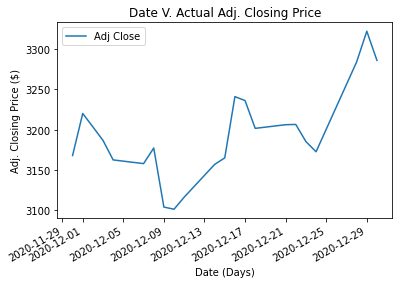

In [ ]:
st = stock_final.query("Name == 'AMZN'") # This line is vital for the program to pick a specific stock to look into
ot = st['Open']
ct = st['Close']
st = st.drop(columns=['Name'])
# Remove all names to make fitting and training accurate with just the numbers in the adjusted closing price (corporate decisions)

st.plot(y='Adj Close') 
plt.title('Date V. Actual Adj. Closing Price')
plt.xlabel('Date (Days)')
plt.ylabel('Adj. Closing Price ($)')
plt.show()

In [ ]:
# Source used for making model: https://randerson112358.medium.com/predict-stock-prices-using-python-machine-learning-53aa024da20a

days = 2 # Number of days you want to predict
#Makes another column called prediction
st['Prediction'] = st[['Adj Close']].shift(-days)

X = np.array(st.drop(['Prediction'],1))

#Take the last 'days' rows to predict the next # of days
X = X[:-days]
#print(X)

y = np.array(st['Prediction'])
# Get all of the y values except the last 'days' of rows
y = y[:-days]
#print(y)

#Train 80% and test 20% of the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

# drops all days before the prediction column, saves only # of days to graph
stockprice = np.array(st.drop(['Prediction'],1))[-days:]

#prediction = lr.predict(stockprice)
#print(prediction)
#check = lr.score(x_test, y_test)
#print("Linear Regression R^2 Score: ", check)
# Use R^2 score to show the predictions represent the dataset well and are trained and tested accurately to the dataset (We want a score close to 1)
# The R^2 score is better with more days to train because the score does not perform well with a few predictions
#plt.plot(prediction)
#plot the predicted values for time period from linear regression model
#plt.title('Linear Regression Model: Days V. Predicted Adj. Closing Price')
#plt.ylabel('Predicted Stock Price Average ($)')
#plt.xlabel('Time (Days)')
#plt.show()

[3200.62985216 3179.33392681]
SVR score: -0.10765317092433911


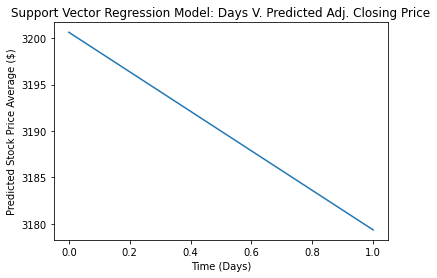

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'poly')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(stockprice)

print(y_pred)
print("SVR score:", regressor.score(x_test,y_test))

import matplotlib.pyplot as plt
plt.title('Support Vector Regression Model: Days V. Predicted Adj. Closing Price')
plt.ylabel('Predicted Stock Price Average ($)')
plt.xlabel('Time (Days)')
plt.plot(y_pred)

In [ ]:
# look through predicted values and create function to find the highest predicted value and the day
count=y_pred[0]
day=0
max = y_pred[0]
for i in range(0,days-1):
  if (y_pred[i] < y_pred[i+1]):
    max = y_pred[i+1]
    day = i+2 # for the accurate number of days and not the array number
print("The highest predicted price in", days, "days is day", day, "with a predicted price of", max)
if (day==0):
  print("This means that the stock price is predicted to go down in the next", days, "days")
# When day 0 is the lowest, that means that the stock price is predicted to go down

The highest predicted price in 2 days is day 0 with a predicted price of 3200.6298521564913
This means that the stock price is predicted to go down in the next 2 days
